In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm

In [44]:
experiment = '7'
first = f'{experiment}.1'
second = f'{experiment}.2'
third = f'{experiment}.3'
# name = 'online-agent-percentage'

In [45]:
data1 = pd.read_csv('experiments/baseline-experiment.csv', skiprows=6)
data2 = pd.read_csv(f'experiments/experiment {first}.csv', skiprows=6)
data3 = pd.read_csv(f'experiments/experiment {second}.csv', skiprows=6)
data4 = pd.read_csv(f'experiments/experiment {third}.csv', skiprows=6)

In [46]:
def calculate_spread(data, run_number):
    spreads = []
    run_data = data[data['[run number]'] == run_number]
    for _, row in run_data.iterrows():
        opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
        spread = max(opinions) - min(opinions)
        spreads.append(spread)
    return spreads

spreads1 = calculate_spread(data1, 1)
spreads2 = calculate_spread(data2, 3)
spreads3 = calculate_spread(data3, 5)
spreads4 = calculate_spread(data4, 2)

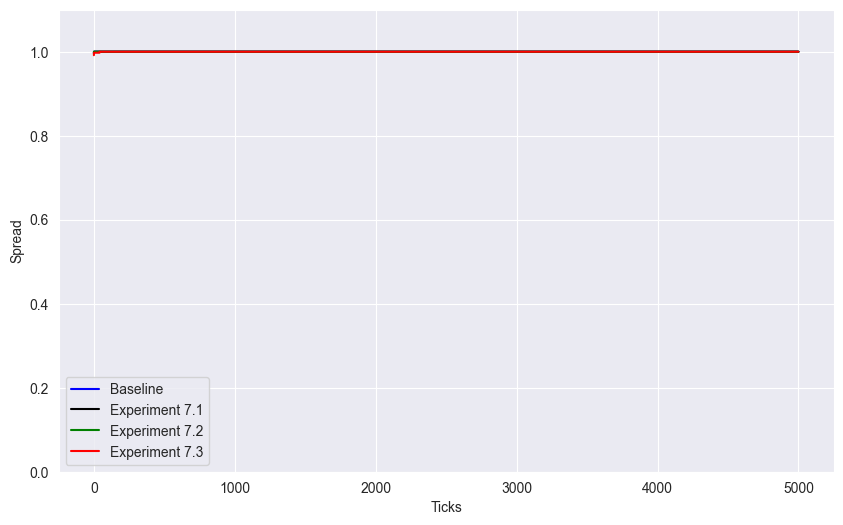

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(spreads1, label='Baseline', color='blue')
plt.plot(spreads2, label=f'Experiment {first}', color='black')
plt.plot(spreads3, label=f'Experiment {second}', color='green')
plt.plot(spreads4, label=f'Experiment {third}', color='red')
plt.xlabel('Ticks')
plt.ylabel('Spread')
plt.ylim(0, 1.1)
plt.legend()
plt.savefig(f'plots/polarisation/experiment-{experiment}-spread.png', dpi=300)
plt.show()